# 1. Análisis exploratorio del conjunto de datos

## Descripción general del dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Carga de datos
df = pd.read_csv("pratice_data\politicES_phase_2_train_public.csv")

print("Dimensiones del dataset (filas, columnas):", df.shape)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\nogue\AppData\Local\Temp\ipykernel_37696\1276860376.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("pratice_data\politicES_phase_2_train_public.csv")


Dimensiones del dataset (filas, columnas): (180000, 6)


,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,¡Feliz 28 de febrero a todas las andaluzas y a...
1,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,"Feliz año nuevo, feliz esperanza 💕. Querido 20..."
2,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...
3,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,El conflicto en Ucrania ha supuesto una dramát...
4,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,La Academia de la Llingua Asturiana realiza un...


In [30]:
# Tipos de datos y nº de no nulos
df.info()

# Porcentaje de valores nulos por columna
null_pct = df.isna().mean().sort_values(ascending=False) * 100
print("\nPorcentaje de valores nulos por columna:")
print(null_pct)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   label                180000 non-null  object
 1   gender               180000 non-null  object
 2   profession           180000 non-null  object
 3   ideology_binary      180000 non-null  object
 4   ideology_multiclass  180000 non-null  object
 5   tweet                180000 non-null  object
dtypes: object(6)
memory usage: 8.2+ MB

Porcentaje de valores nulos por columna:
label                  0.0
gender                 0.0
profession             0.0
ideology_binary        0.0
ideology_multiclass    0.0
tweet                  0.0
dtype: float64


## Estadísticas básicas y visualizaciones simples

ideology_binary
left     100400
right     79600
Name: count, dtype: int64

Distribución porcentual (%):
ideology_binary
left     55.777778
right    44.222222
Name: proportion, dtype: float64


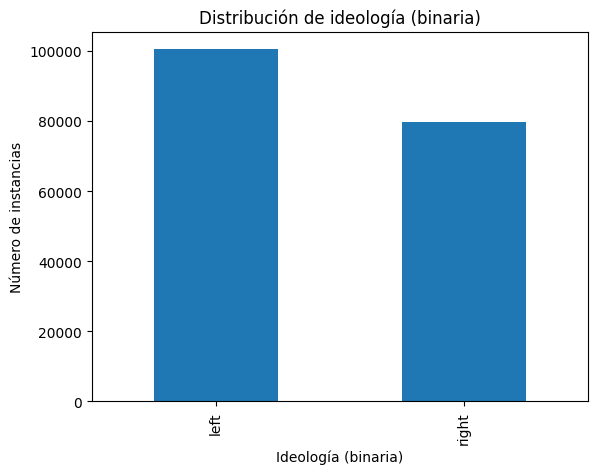

ideology_multiclass
moderate_left     66000
moderate_right    58240
left              34400
right             21360
Name: count, dtype: int64

Distribución porcentual (%):
ideology_multiclass
moderate_left     36.666667
moderate_right    32.355556
left              19.111111
right             11.866667
Name: proportion, dtype: float64


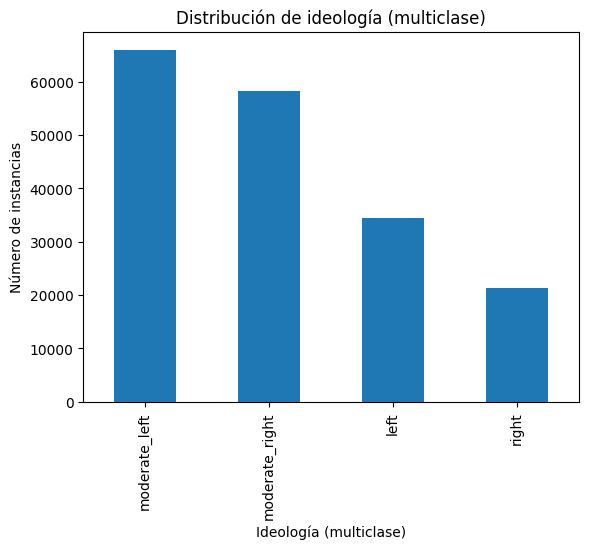

gender
male      119440
female     60560
Name: count, dtype: int64

Distribución porcentual (%):
gender
male      66.355556
female    33.644444
Name: proportion, dtype: float64


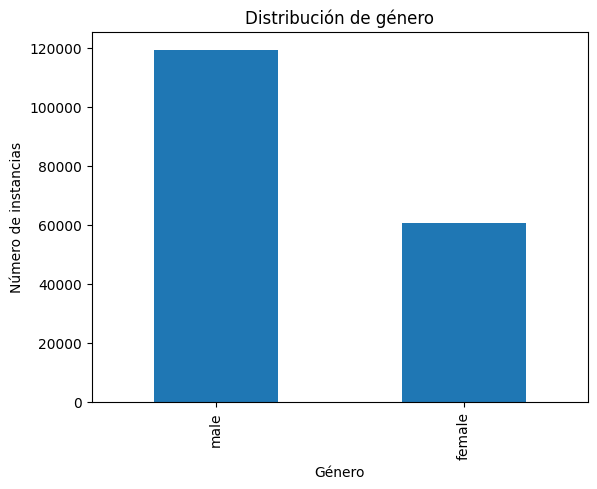

profession
journalist    110800
politician     60160
celebrity       9040
Name: count, dtype: int64

Distribución porcentual (%):
profession
journalist    61.555556
politician    33.422222
celebrity      5.022222
Name: proportion, dtype: float64


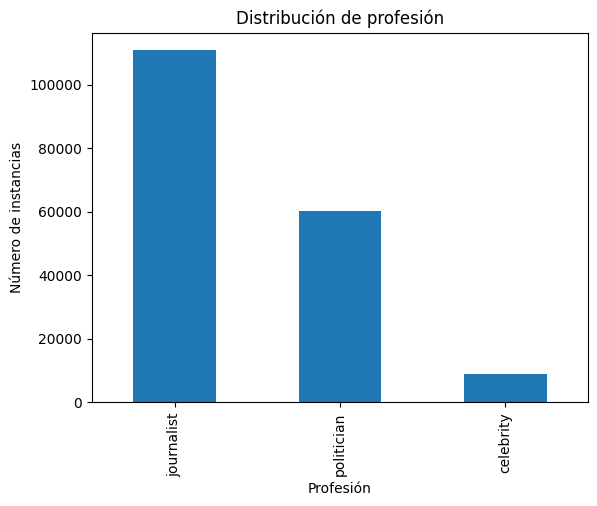

In [31]:
def plot_bar_counts(series, title, xlabel):
    counts = series.value_counts()
    print(counts)
    print("\nDistribución porcentual (%):")
    print(series.value_counts(normalize=True) * 100)

    counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Número de instancias")
    plt.show()

# Distribución de ideología binaria
plot_bar_counts(df["ideology_binary"], "Distribución de ideología (binaria)", "Ideología (binaria)")

# Distribución de ideología multiclase
plot_bar_counts(df["ideology_multiclass"], "Distribución de ideología (multiclase)", "Ideología (multiclase)")

# Distribución de género
plot_bar_counts(df["gender"], "Distribución de género", "Género")

# Distribución de profesión
plot_bar_counts(df["profession"], "Distribución de profesión", "Profesión")

Estadísticas de longitud en caracteres:
count    180000.000000
mean        167.976806
std          76.281273
min          17.000000
25%          98.000000
50%         163.000000
75%         243.000000
max         511.000000
Name: tweet_len_char, dtype: float64

Estadísticas de longitud en tokens:
count    180000.000000
mean         28.758622
std          12.789524
min           4.000000
25%          17.000000
50%          28.000000
75%          40.000000
max          65.000000
Name: tweet_len_tokens, dtype: float64


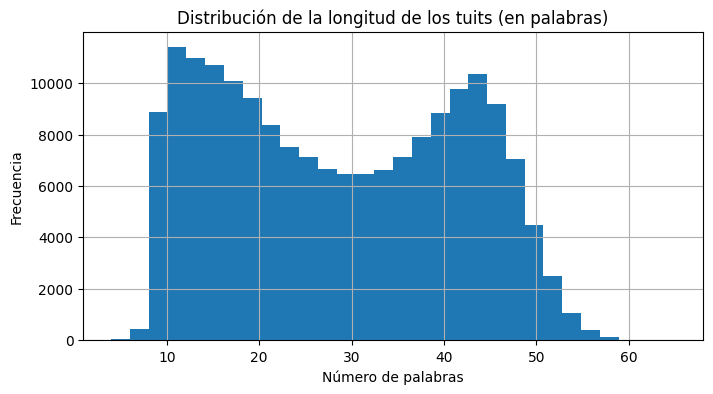

<Figure size 600x400 with 0 Axes>

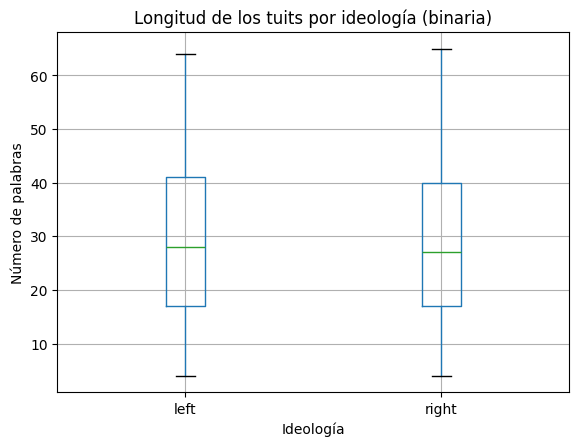


Media de longitud (tokens) por ideología:
ideology_binary
left     28.946494
right    28.521658
Name: tweet_len_tokens, dtype: float64


In [32]:
TEXT_COL = "tweet"

# Longitud en caracteres y en nº de palabras
df["tweet_len_char"] = df[TEXT_COL].astype(str).str.len()
df["tweet_len_tokens"] = df[TEXT_COL].astype(str).str.split().str.len()

print("Estadísticas de longitud en caracteres:")
print(df["tweet_len_char"].describe())

print("\nEstadísticas de longitud en tokens:")
print(df["tweet_len_tokens"].describe())

# Histograma global (en palabras)
plt.figure(figsize=(8, 4))
df["tweet_len_tokens"].hist(bins=30)
plt.title("Distribución de la longitud de los tuits (en palabras)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot por ideología binaria
plt.figure(figsize=(6, 4))
df.boxplot(column="tweet_len_tokens", by="ideology_binary")
plt.title("Longitud de los tuits por ideología (binaria)")
plt.suptitle("")  # quita el título automático de pandas
plt.xlabel("Ideología")
plt.ylabel("Número de palabras")
plt.show()

# medias por ideología para comentar en la memoria
print("\nMedia de longitud (tokens) por ideología:")
print(df.groupby("ideology_binary")["tweet_len_tokens"].mean())

## Análisis preliminar del texto

#### Palabras más palabras más frecuentes por ideología

In [33]:
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Descargar stopwords de NLTK (solo la primera vez)
nltk.download('stopwords')

# Definición de stopwords por niveles
spanish_stopwords = stopwords.words('spanish')

# Stopwords específicas del dataset PoliticES (menciones y tokens comunes de Twitter)
dataset_stopwords = [
    "rt", "https", "http", "tco", "amp"
]

# Palabras muy generales (poco informativas) detectadas tras una primera inspección
extra_stopwords = [
    "user", "hashtag", "politician", "political_party",
    "si", "hoy", "gracias", "ser", "hace", "años", "anos",
    "día", "dia", "ahora", "siempre"
]

def build_stopwords(level: str = "refinado"):
    """
    Se especifica el nivel para mostrar que se ha ejecutado dos veces para crear 
    level:
        - "inicial":  spanish_stopwords + dataset_stopwords
        - "refinado": spanish_stopwords + dataset_stopwords + extra_stopwords
    """
    sw = set(spanish_stopwords)
    
    if level in ("inicial", "refinado"):
        sw.update(dataset_stopwords)
    if level == "refinado":
        sw.update(extra_stopwords)
    
    return list(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nogue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Función de limpieza de texto
def clean_tweet(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)   # eliminar URLs
    text = re.sub(r"@\w+", "", text)      # eliminar menciones
    text = re.sub(r"#", "", text)         # quitar símbolo de hashtag, pero no la palabra
    return text
    
# Crear columna 'tweet_clean'
df["tweet_clean"] = df["tweet"].astype(str).apply(clean_tweet)

# Función general para obtener top palabras por etiqueta
def top_words_for_label(
    df: pd.DataFrame,
    col_label: str,
    value: str,
    text_col: str = "tweet_clean",
    n: int = 20,
    stopwords_level: str = "refinado"
):

    # Filter texts for the chosen label
    texts = df[df[col_label] == value][text_col].astype(str).values
    
    # Build stopword list
    stop_words = build_stopwords(level=stopwords_level)
    
    # Vectorize
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(texts)
    
    # Compute global term frequencies
    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    
    freq = pd.Series(word_counts, index=vocab).sort_values(ascending=False)
    return freq.head(n)

In [35]:
# top palabras para izquierda y derecha, versión "refinada"
top_left_inicial  = top_words_for_label(df, "ideology_binary", "left",  n=20, stopwords_level="inicial")
top_right_inicial = top_words_for_label(df, "ideology_binary", "right", n=20, stopwords_level="inicial")

print("Top 20 palabras en tuits de izquierda (stopwords refinado):")
print(top_left_inicial)

print("\nTop 20 palabras en tuits de derecha (stopwords refinado):")
print(top_right_inicial)

Top 20 palabras en tuits de izquierda (stopwords refinado):
hashtag            11767
politician          8816
political_party     8735
si                  8599
hoy                 7729
gobierno            5622
años                5380
gracias             5359
españa              4904
ser                 4709
hace                4402
ley                 3478
madrid              3470
solo                3447
día                 3280
ahora               3242
aquí                3156
siempre             3149
dos                 3140
así                 3071
dtype: int64

Top 20 palabras en tuits de derecha (stopwords refinado):
politician         11007
political_party     8597
hashtag             7326
si                  6611
gobierno            6556
hoy                 5923
españa              5666
gracias             3795
ser                 3669
años                3541
madrid              3056
ley                 3055
hace                2897
día                 2877
ahora             

In [36]:
# top palabras para izquierda y derecha, versión "refinada"
top_left  = top_words_for_label(df, "ideology_binary", "left",  n=20, stopwords_level="refinado")
top_right = top_words_for_label(df, "ideology_binary", "right", n=20, stopwords_level="refinado")

print("Top 20 palabras en tuits de izquierda (stopwords refinado):")
print(top_left)

print("\nTop 20 palabras en tuits de derecha (stopwords refinado):")
print(top_right)

Top 20 palabras en tuits de izquierda (stopwords refinado):
gobierno    5622
españa      4904
ley         3478
madrid      3470
solo        3447
aquí        3156
dos         3140
así         3071
mejor       2883
país        2857
hacer       2811
puede       2770
gente       2678
año         2648
va          2614
bien        2612
ver         2612
vida        2552
personas    2520
política    2475
dtype: int64

Top 20 palabras en tuits de derecha (stopwords refinado):
gobierno     6556
españa       5666
madrid       3056
ley          3055
solo         2516
así          2329
puede        2315
mejor        2245
va           2217
gran         2206
dos          2093
aquí         2065
bien         2057
menos        1998
año          1941
hacer        1907
vez          1879
política     1876
vida         1774
españoles    1762
dtype: int64


#### Palabras más características de cada ideología

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Vectorizamos el corpus con las mismas stopwords
vectorizer_char = CountVectorizer(
    stop_words=build_stopwords(level="extended"),
    min_df=20  # filtra palabras muy raras
)
X_all = vectorizer_char.fit_transform(df["tweet_clean"])
vocab = vectorizer_char.get_feature_names_out()

y = df["ideology_binary"].values
mask_left = (y == "left")
mask_right = (y == "right")

# Frecuencias por clase
freq_left = np.asarray(X_all[mask_left].sum(axis=0)).ravel()
freq_right = np.asarray(X_all[mask_right].sum(axis=0)).ravel()

# Probabilidades con suavizado
alpha = 1.0
p_left = (freq_left + alpha) / (freq_left.sum() + alpha * len(vocab))
p_right = (freq_right + alpha) / (freq_right.sum() + alpha * len(vocab))

# Log-odds: palabras más "de izquierda" y más "de derecha"
log_ratio = np.log(p_left / p_right)

top_left_specific = pd.Series(log_ratio, index=vocab).sort_values(ascending=False).head(20)
top_right_specific = pd.Series(log_ratio, index=vocab).sort_values(ascending=True).head(20)

print("Top 20 palabras más características de izquierda:")
print(top_left_specific)

print("\nTop 20 palabras más características de derecha:")
print(top_right_specific)


Top 20 palabras más características de izquierda:
bdía               5.116986
795                4.678264
còrdoba            4.133037
riojanas           4.120458
residente          4.094816
797                3.977844
cafetera           3.656344
omisiones          3.512210
dunas              3.414572
falleció           3.414572
291                3.361928
fsa                3.361928
impedía            3.320543
comisionista       3.216746
recito             3.184997
pornoxplotacion    3.152208
riojano            3.152208
dl                 3.135400
asturies           3.083215
maspalomas         3.083215
dtype: float64

Top 20 palabras más características de derecha:
recuadro         -5.097106
snchz            -4.902950
castillón        -4.792285
sanchista        -4.770778
infobae          -4.748800
despegamos       -4.539449
soñadores        -4.309433
sánchezstein     -4.256323
cómame           -4.120191
narcocomunismo   -4.077631
madfintech       -3.962562
fintech          -3.937869
sa

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_from_series(series, title):
    """
    series: pandas.Series con índice = palabra, valor = peso/frecuencia
    """
    freqs = {word: float(weight) for word, weight in series.items()}

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


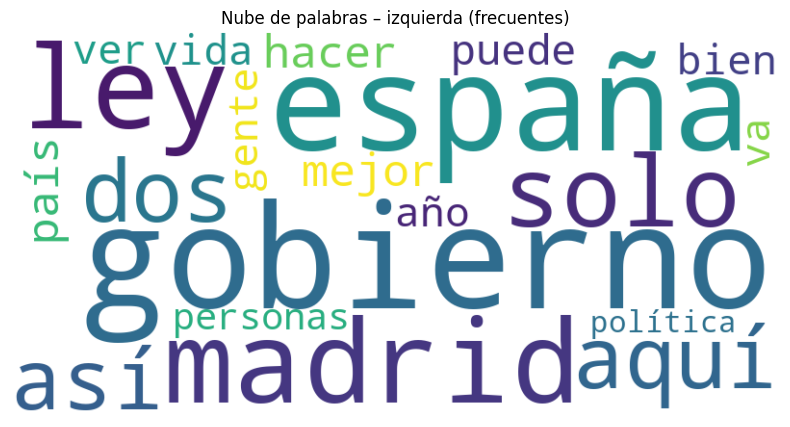

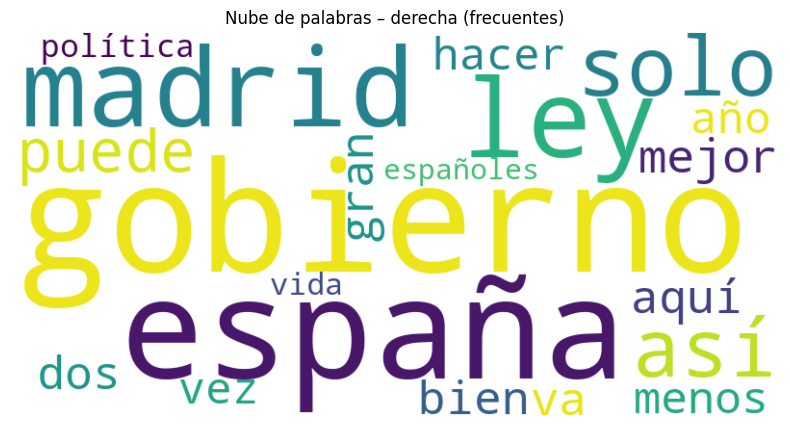

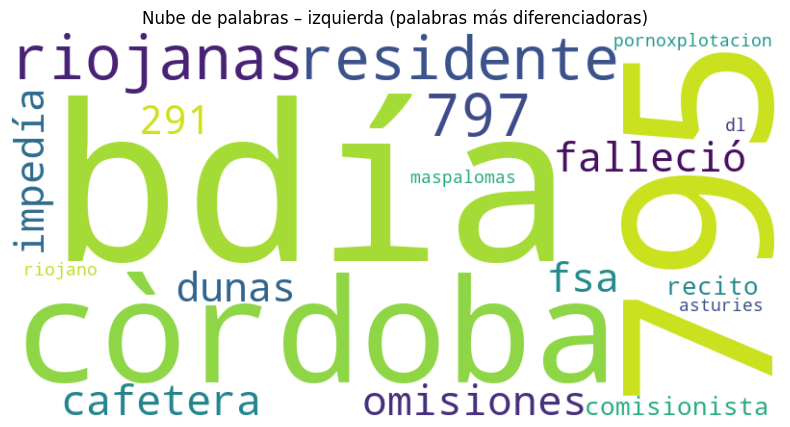

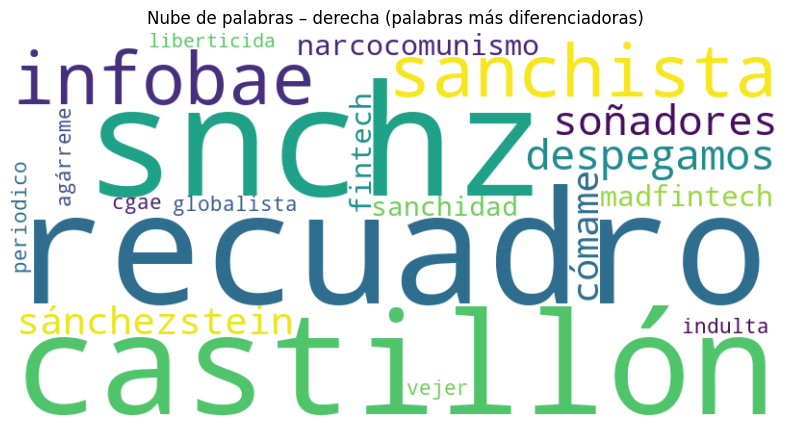

In [39]:
# Izquierda: palabras más frecuentes
plot_wordcloud_from_series(
    top_left,  
    "Nube de palabras – izquierda (frecuentes)"
)

# Derecha: palabras más frecuentes
plot_wordcloud_from_series(
    top_right, 
    "Nube de palabras – derecha (frecuentes)"
)

# Izquierda: los valores ya son positivos
plot_wordcloud_from_series(
    top_left_specific,
    "Nube de palabras – izquierda (palabras más diferenciadoras)"
)

# Derecha: multiplicamos por -1 para hacer los pesos positivos
plot_wordcloud_from_series(
    -top_right_specific,
    "Nube de palabras – derecha (palabras más diferenciadoras)"
)


## Formulación de hipótesis iniciales sobre posibles relaciones entre desinformación y polarización.

In [ ]:

disinfo_keywords = [
    "bulo", "bulos",
    "fake news", "fakenews",
    "mentira", "mentiras",
    "fraude", "fraudes",
    "manipulación", "manipulado", "manipulada",
    "desinformación", "hoax"
]

pattern = "|".join(disinfo_keywords)

# Creación de columna que dide si tiene alguna palabra de la lista
df["has_disinfo_kw"] = df["tweet_clean"].str.contains(pattern, case=False, regex=True)

print("Conteo de tuits con / sin palabras de desinformación:")
print(df["has_disinfo_kw"].value_counts())
print("\nPorcentaje:")
print((df["has_disinfo_kw"].value_counts(normalize=True) * 100).round(2))

print("\nDistribución por ideología (normalizada por columna):")
display(pd.crosstab(df["ideology_binary"], df["has_disinfo_kw"], normalize="columns").round(3))



Conteo de tuits con / sin palabras de desinformación:
has_disinfo_kw
False    177609
True       2391
Name: count, dtype: int64

Porcentaje:
has_disinfo_kw
False    98.67
True      1.33
Name: proportion, dtype: float64

Distribución por ideología (normalizada por columna):


has_disinfo_kw,False,True
ideology_binary,,
left,0.557,0.589
right,0.443,0.411


Total de tuits: 177609 + 2391 = 180000 aprox.

Con palabras de “desinfo”: 2.391 tuits (~1,33 %)

Sin esas palabras: 177.609 tuits (~98,67 %)

# 2. Representación vectorial del texto

En primer lugar, se fija una partición del conjunto de datos en train, valid y test que se mantiene constante en todos los modelos que lo requieran y asi entrenar solo con el conjunto de entrenamiento.

In [41]:
from sklearn.model_selection import train_test_split

# Asumo estos nombres (ajusta si son diferentes)
X = df['tweet_clean']
y = df['ideology_binary']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print("Train size:", len(X_train))
print("Valid size:", len(X_valid))
print("Test size:", len(X_test))


Train size: 126000
Valid size: 27000
Test size: 27000


## TF-IDF (representación basada en frecuencias)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),   # uni + bi
    min_df=3,             # de 5 -> 3 ignora términos muy raros a más bajo más capta
    max_df=0.9,           # un pelín más permisivo # ignora términos muy frecuentes
    max_features=30000,   # aumentar vocabulario 
    sublinear_tf=True     # tf = 1 + log(tf)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)
X_test_tfidf  = tfidf_vectorizer.transform(X_test)



## Word2Vec (promedio de embeddings de palabras)

Cada documento = media de los embeddings de sus palabras.

In [ ]:
from gensim.models import Word2Vec

# Listas de tokens para entrenar Word2Vec
train_sentences = [text.split() for text in X_train]

w2v_model = Word2Vec(
    sentences=train_sentences,
    vector_size=100,   # dimensión del embedding
    window=5,
    min_count=5,       # ignora palabras muy raras
    workers=4,
    sg=1               # 1 = skip-gram, 0 = CBOW
)

In [ ]:
import numpy as np

def doc_vector_w2v(model, text):
    words = text.split()
    word_vecs = [model.wv[w] for w in words if w in model.wv]
    if len(word_vecs) == 0:
        # Si ninguna palabra está en el vocabulario, se devuelve vector de ceros
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

def transform_w2v(model, texts):
    return np.vstack([doc_vector_w2v(model, t) for t in texts])


In [45]:
X_train_w2v = transform_w2v(w2v_model, X_train)
X_valid_w2v = transform_w2v(w2v_model, X_valid)
X_test_w2v  = transform_w2v(w2v_model, X_test)

X_train_w2v.shape, X_valid_w2v.shape, X_test_w2v.shape


((126000, 100), (27000, 100), (27000, 100))

In [ ]:
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

print("numpy:", np.__version__)
print("torch:", torch.__version__)

model_name = "dccuchile/bert-base-spanish-wwm-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)


numpy: 1.26.4
torch: 2.7.1+cu128


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT OK ✅


## BERT (Bidirectional Encoder Representations from Transformers)

In [47]:
import torch

print("Versión de PyTorch:", torch.__version__)
print("CUDA disponible:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Nombre GPU:", torch.cuda.get_device_name(0))


Versión de PyTorch: 2.7.1+cu128
CUDA disponible: True
Nombre GPU: NVIDIA GeForce RTX 4060


In [48]:
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

model_name = "dccuchile/bert-base-spanish-wwm-cased"

tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
bert_model.eval()

print("Usando dispositivo:", device)

MAX_LEN = 64


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Usando dispositivo: cuda


In [49]:
def encode_texts_bert(texts, batch_size=32, max_len=MAX_LEN):
    """
    Toma una lista/serie de textos y devuelve una matriz numpy
    de embeddings [CLS] de tamaño (n_samples, hidden_dim).
    """
    all_embeddings = []
    texts = list(texts)

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        # Tokenización en batch
        encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_len,
            return_tensors="pt"
        )

        # Mover a GPU/CPU
        encodings = {k: v.to(device) for k, v in encodings.items()}

        # Paso por BERT
        with torch.no_grad():
            outputs = bert_model(**encodings)
            # last_hidden_state: (batch, seq_len, hidden_dim)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # token [CLS]

        all_embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(all_embeddings)


In [50]:
X_train_bert = encode_texts_bert(X_train)
X_valid_bert = encode_texts_bert(X_valid)
X_test_bert  = encode_texts_bert(X_test)

X_train_bert.shape, X_valid_bert.shape, X_test_bert.shape


((126000, 768), (27000, 768), (27000, 768))

# 3. Modelos

## 3.1 Logistic Regression de Scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### 3.1.1 LogReg usando TF-IDF

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

Cs_grid = np.logspace(-3, 2, 10)   # 0.001, 0.003, ..., 100

logregcv_tfidf_bal = LogisticRegressionCV(
    Cs=Cs_grid,
    cv=10,                    # de 5 → 10 folds (el doble de trabajo)
    max_iter=2000,            # por si alguna combinación tarda en converger
    n_jobs=-1,
    class_weight='balanced',
    penalty='l2',
    solver='lbfgs',
    scoring='f1_macro'
)

logregcv_tfidf_bal.fit(X_train_tfidf, y_train)
print("C elegido (balanced):", logregcv_tfidf_bal.C_)

y_valid_pred_bal = logregcv_tfidf_bal.predict(X_valid_tfidf)
print("TF-IDF + LogRegCV (balanced, grid fino) – VALID acc:",
      accuracy_score(y_valid, y_valid_pred_bal))
print(classification_report(y_valid, y_valid_pred_bal))



C elegido (balanced): [0.59948425]
TF-IDF + LogRegCV (balanced, grid fino) – VALID acc: 0.6880740740740741
              precision    recall  f1-score   support

        left       0.73      0.70      0.72     15060
       right       0.64      0.67      0.65     11940

    accuracy                           0.69     27000
   macro avg       0.68      0.69      0.69     27000
weighted avg       0.69      0.69      0.69     27000



### 3.1.2 LogReg usando Word2Vec

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

# Grid de C para la LogReg
Cs_grid = np.logspace(-3, 2, 10)   # 0.001 ... 100

logregcv_w2v_bal = LogisticRegressionCV(
    Cs=Cs_grid,
    cv=5,
    max_iter=2000,
    n_jobs=-1,
    class_weight='balanced',   # equilibrar clases left/right
    penalty='l2',
    solver='lbfgs',
    scoring='f1_macro'         # optimizamos F1 macro
)

# Entrenamos modelo sobre los embeddings Word2Vec
logregcv_w2v_bal.fit(X_train_w2v, y_train)

print("C elegido (Word2Vec, balanced):", logregcv_w2v_bal.C_)

# VALIDACIÓN
y_valid_pred_w2v_bal = logregcv_w2v_bal.predict(X_valid_w2v)
print("Word2Vec + LogRegCV (balanced) – VALID acc:",
      accuracy_score(y_valid, y_valid_pred_w2v_bal))
print(classification_report(y_valid, y_valid_pred_w2v_bal))

# TEST
y_test_pred_w2v_bal = logregcv_w2v_bal.predict(X_test_w2v)
print("Word2Vec + LogRegCV (balanced) – TEST acc:",
      accuracy_score(y_test, y_test_pred_w2v_bal))
print(classification_report(y_test, y_test_pred_w2v_bal))



C elegido (Word2Vec, balanced): [2.15443469]
Word2Vec + LogRegCV (balanced) – VALID acc: 0.5821851851851851
              precision    recall  f1-score   support

        left       0.63      0.59      0.61     15060
       right       0.53      0.57      0.55     11940

    accuracy                           0.58     27000
   macro avg       0.58      0.58      0.58     27000
weighted avg       0.59      0.58      0.58     27000

Word2Vec + LogRegCV (balanced) – TEST acc: 0.5844444444444444
              precision    recall  f1-score   support

        left       0.64      0.59      0.61     15060
       right       0.53      0.58      0.55     11940

    accuracy                           0.58     27000
   macro avg       0.58      0.58      0.58     27000
weighted avg       0.59      0.58      0.59     27000



### 3.1.3 LogReg usando BERT

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Pipeline: scaler + LogReg
pipe_bert = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,
        n_jobs=-1,
        solver="lbfgs",
        penalty="l2"
    ))
])

# Espacio de hiperparámetros
Cs_grid = np.logspace(-3, 2, 10)  # 0.001 ... 100

param_grid_bert = {
    "clf__C": Cs_grid,
    "clf__class_weight": [None, "balanced"],
}

# Validación cruzada estratificada
cv_bert = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_bert = GridSearchCV(
    estimator=pipe_bert,
    param_grid=param_grid_bert,
    cv=cv_bert,
    scoring="f1_macro",   # optimizamos F1 macro (equilibrar left/right)
    n_jobs=-1,
    verbose=2
)

# 4) ENTRENAMIENTO
grid_bert.fit(X_train_bert, y_train)

print("Mejores hiperparámetros (BERT + LogReg):")
print(grid_bert.best_params_)
print("Mejor score CV (f1_macro):", grid_bert.best_score_)

best_bert_model = grid_bert.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros (BERT + LogReg):
{'clf__C': 27.825594022071257, 'clf__class_weight': 'balanced'}
Mejor score CV (f1_macro): 0.6140812019630415


In [ ]:
# VALIDACIÓN
y_valid_pred_bert = best_bert_model.predict(X_valid_bert)
print("BERT + LogReg (tuned) – VALIDACIÓN acc:",
      accuracy_score(y_valid, y_valid_pred_bert))
print(classification_report(y_valid, y_valid_pred_bert))

# TEST
y_test_pred_bert = best_bert_model.predict(X_test_bert)
print("BERT + LogReg (tuned) – TEST acc:",
      accuracy_score(y_test, y_test_pred_bert))
print(classification_report(y_test, y_test_pred_bert))


BERT + LogReg (tuned) – VALID acc: 0.6187777777777778
              precision    recall  f1-score   support

        left       0.67      0.62      0.64     15060
       right       0.56      0.62      0.59     11940

    accuracy                           0.62     27000
   macro avg       0.62      0.62      0.62     27000
weighted avg       0.62      0.62      0.62     27000

BERT + LogReg (tuned) – TEST acc: 0.6139629629629629
              precision    recall  f1-score   support

        left       0.67      0.61      0.64     15060
       right       0.56      0.61      0.58     11940

    accuracy                           0.61     27000
   macro avg       0.61      0.61      0.61     27000
weighted avg       0.62      0.61      0.62     27000



## 3.2 Modelos con red neuronal implementada en PyTorch.

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_valid_enc = label_encoder.transform(y_valid)
y_test_enc  = label_encoder.transform(y_test)

print("Clases:", label_encoder.classes_)



Clases: ['left' 'right']


### 3.2.1 BERT + MLP (PyTorch)

In [31]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class NumpyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.asarray(X), dtype=torch.float32)
        self.y = torch.tensor(np.asarray(y), dtype=torch.long)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def make_loaders(X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=256):
    train_ds = NumpyDataset(X_train, y_train)
    valid_ds = NumpyDataset(X_valid, y_valid)
    test_ds  = NumpyDataset(X_test,  y_test)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False)

    return train_loader, valid_loader, test_loader

batch_size_bert = 256  # o 128 si falta memoria

train_loader_bert, valid_loader_bert, test_loader_bert = make_loaders(
    X_train_bert, y_train_enc,
    X_valid_bert, y_valid_enc,
    X_test_bert,  y_test_enc,
    batch_size=batch_size_bert
)

input_dim_bert = X_train_bert.shape[1]
output_dim = len(label_encoder.classes_)
input_dim_bert, output_dim


(768, 2)

In [32]:
import torch.nn as nn

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(
        self,
        input_dim,
        output_dim,
        hidden_dim=(256, 64),
        initialize_weights=True,
        p=0.5,
        use_batchnorm=True
    ):
        super().__init__()
        sizes = [input_dim] + list(map(int, hidden_dim)) + [output_dim]
        layers = []
        for i in range(len(sizes) - 2):
            layers.append(nn.Linear(sizes[i], sizes[i + 1]))
            if initialize_weights:
                torch.nn.init.kaiming_uniform_(layers[-1].weight)
            if use_batchnorm:
                layers.append(nn.BatchNorm1d(sizes[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=p))
        layers.append(nn.Linear(sizes[-2], sizes[-1]))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# Entrenamiento con F1-macro y early stopping

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Entrenando en:", device)

def train_one_model(
    model,
    train_loader,
    valid_loader,
    num_epochs=20,
    lr=1e-3,
    weight_decay=1e-4,
    patience=3
):
    model = model.to(device)
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    best_val_f1 = -1.0
    best_state = None
    epochs_no_improve = 0

    for epoch in range(1, num_epochs + 1):
        # TRAIN
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            optimizer.zero_grad()
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * xb.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # VALIDACIÓN
        model.eval()
        val_loss = 0.0
        all_preds, all_true = [], []
        with torch.no_grad():
            for xb, yb in valid_loader:
                xb = xb.to(device)
                yb = yb.to(device)

                pred = model(xb)
                loss = loss_func(pred, yb)
                val_loss += loss.item() * xb.size(0)

                preds = pred.argmax(dim=1).cpu().numpy()
                all_preds.extend(preds)
                all_true.extend(yb.cpu().numpy())

        val_loss /= len(valid_loader.dataset)
        val_f1 = f1_score(all_true, all_preds, average="macro")
        val_acc = accuracy_score(all_true, all_preds)

        print(f"Epoch {epoch:02d} | "
              f"Train loss: {train_loss:.4f} | "
              f"Val loss: {val_loss:.4f} | "
              f"Val acc: {val_acc:.4f} | "
              f"Val F1_macro: {val_f1:.4f}")

        # Early stopping en F1-macro
        if val_f1 > best_val_f1 + 1e-4:
            best_val_f1 = val_f1
            best_state = model.state_dict()
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping activado.")
                break

    if best_state is not None:
        model.load_state_dict(best_state)

    return model, best_val_f1


Entrenando en: cuda


In [ ]:
# Búsqueda de hiperparámetros
import itertools

param_grid_bert = {
    "hidden_dim": [(256, 64), (512, 128)],
    "dropout": [0.3, 0.5],
    "lr": [1e-3, 3e-4],
    "weight_decay": [0.0, 1e-4],
}

configs_bert = list(itertools.product(
    param_grid_bert["hidden_dim"],
    param_grid_bert["dropout"],
    param_grid_bert["lr"],
    param_grid_bert["weight_decay"],
))

print("Total configs BERT:", len(configs_bert))

best_config_bert = None
best_model_bert = None
best_val_f1_bert = -1.0

for hidden_dim, dropout, lr, wd in configs_bert:
    print("\n=== BERT MLP, nueva configiguración ===")
    print(f"hidden_dim={hidden_dim}, dropout={dropout}, lr={lr}, weight_decay={wd}")

    model = FeedforwardNeuralNetModel(
        input_dim=input_dim_bert,
        output_dim=output_dim,
        hidden_dim=hidden_dim,
        initialize_weights=True,
        p=dropout,
        use_batchnorm=True
    )

    model, val_f1 = train_one_model(
        model,
        train_loader_bert,
        valid_loader_bert,
        num_epochs=20,
        lr=lr,
        weight_decay=wd,
        patience=3
    )

    print(f"F1_macro VALIDACIÓN (BERT) para esta configuración: {val_f1:.4f}")

    if val_f1 > best_val_f1_bert:
        best_val_f1_bert = val_f1
        best_config_bert = (hidden_dim, dropout, lr, wd)
        best_model_bert = model

print("\nMejor config BERT + MLP:", best_config_bert)
print("Mejor F1_macro VALIDACIÓN (BERT):", best_val_f1_bert)



Total configs BERT: 16

=== BERT MLP, nueva config ===
hidden_dim=(256, 64), dropout=0.3, lr=0.001, weight_decay=0.0
Epoch 01 | Train loss: 0.6558 | Val loss: 0.6333 | Val acc: 0.6364 | Val F1_macro: 0.6191
Epoch 02 | Train loss: 0.6317 | Val loss: 0.6267 | Val acc: 0.6437 | Val F1_macro: 0.6356
Epoch 03 | Train loss: 0.6208 | Val loss: 0.6203 | Val acc: 0.6492 | Val F1_macro: 0.6403
Epoch 04 | Train loss: 0.6109 | Val loss: 0.6140 | Val acc: 0.6556 | Val F1_macro: 0.6450
Epoch 05 | Train loss: 0.6027 | Val loss: 0.6119 | Val acc: 0.6570 | Val F1_macro: 0.6475
Epoch 06 | Train loss: 0.5937 | Val loss: 0.6108 | Val acc: 0.6585 | Val F1_macro: 0.6334
Epoch 07 | Train loss: 0.5850 | Val loss: 0.6100 | Val acc: 0.6576 | Val F1_macro: 0.6521
Epoch 08 | Train loss: 0.5768 | Val loss: 0.6064 | Val acc: 0.6628 | Val F1_macro: 0.6553
Epoch 09 | Train loss: 0.5681 | Val loss: 0.6049 | Val acc: 0.6645 | Val F1_macro: 0.6548
Epoch 10 | Train loss: 0.5597 | Val loss: 0.6060 | Val acc: 0.6656 | Val 

In [ ]:
# Evaluar en TEST
from sklearn.metrics import classification_report

def evaluate_on_test(model, test_loader, label_encoder):
    model.eval()
    all_preds, all_true = [], []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            pred = model(xb)
            preds = pred.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_true.extend(yb.numpy())

    all_preds_labels = label_encoder.inverse_transform(all_preds)
    all_true_labels  = label_encoder.inverse_transform(all_true)

    print("Accuracy TEST:",
          accuracy_score(all_true_labels, all_preds_labels))
    print(classification_report(all_true_labels, all_preds_labels))

print("\nBERT + MLP (mejor configuración) – TEST")
evaluate_on_test(best_model_bert, test_loader_bert, label_encoder)



BERT + MLP (mejor config) – TEST
Accuracy TEST: 0.6635555555555556
              precision    recall  f1-score   support

        left       0.70      0.70      0.70     15060
       right       0.62      0.61      0.62     11940

    accuracy                           0.66     27000
   macro avg       0.66      0.66      0.66     27000
weighted avg       0.66      0.66      0.66     27000



### 3.2.2 TF-IDF + MLP (PyTorch)

In [36]:
import numpy as np
from scipy.sparse import issparse

def to_dense_float32(X):
    if issparse(X):
        return X.toarray().astype(np.float32)
    else:
        return np.asarray(X, dtype=np.float32)

X_train_tfidf_np = to_dense_float32(X_train_tfidf)
X_valid_tfidf_np = to_dense_float32(X_valid_tfidf)
X_test_tfidf_np  = to_dense_float32(X_test_tfidf)

X_train_tfidf_np.shape, X_valid_tfidf_np.shape, X_test_tfidf_np.shape


((126000, 30000), (27000, 30000), (27000, 30000))

In [ ]:
batch_size_tfidf = 256

train_loader_tfidf, valid_loader_tfidf, test_loader_tfidf = make_loaders(
    X_train_tfidf_np, y_train_enc,
    X_valid_tfidf_np, y_valid_enc,
    X_test_tfidf_np,  y_test_enc,
    batch_size=batch_size_tfidf
)

input_dim_tfidf = X_train_tfidf_np.shape[1]
output_dim = len(label_encoder.classes_)

input_dim_tfidf, output_dim


(30000, 2)

In [38]:
import itertools

param_grid_tfidf = {
    "hidden_dim": [(256,), (512,)],   # una capa oculta
    "dropout": [0.3, 0.5],
    "lr": [1e-3, 3e-4],
    "weight_decay": [0.0, 1e-4],
}

configs_tfidf = list(itertools.product(
    param_grid_tfidf["hidden_dim"],
    param_grid_tfidf["dropout"],
    param_grid_tfidf["lr"],
    param_grid_tfidf["weight_decay"],
))

print("Total configs TF-IDF:", len(configs_tfidf))


Total configs TF-IDF: 16


In [ ]:
best_config_tfidf = None
best_model_tfidf = None
best_val_f1_tfidf = -1.0

for hidden_dim, dropout, lr, wd in configs_tfidf:
    print("\n=== TF-IDF MLP, nueva configuración ===")
    print(f"hidden_dim={hidden_dim}, dropout={dropout}, lr={lr}, weight_decay={wd}")

    model = FeedforwardNeuralNetModel(
        input_dim=input_dim_tfidf,
        output_dim=output_dim,
        hidden_dim=hidden_dim,
        initialize_weights=True,
        p=dropout,
        use_batchnorm=True
    )

    model, val_f1 = train_one_model(
        model,
        train_loader_tfidf,
        valid_loader_tfidf,
        num_epochs=20,
        lr=lr,
        weight_decay=wd,
        patience=3
    )

    print(f"F1_macro VALIDACIÓN (TF-IDF) para esta configuración: {val_f1:.4f}")

    if val_f1 > best_val_f1_tfidf:
        best_val_f1_tfidf = val_f1
        best_config_tfidf = (hidden_dim, dropout, lr, wd)
        best_model_tfidf = model

print("\nMejor config TF-IDF + MLP:", best_config_tfidf)
print("Mejor F1_macro VALIDACIÓN (TF-IDF):", best_val_f1_tfidf)



=== TF-IDF MLP, nueva config ===
hidden_dim=(256,), dropout=0.3, lr=0.001, weight_decay=0.0
Epoch 01 | Train loss: 0.6006 | Val loss: 0.5684 | Val acc: 0.6896 | Val F1_macro: 0.6824
Epoch 02 | Train loss: 0.4616 | Val loss: 0.5871 | Val acc: 0.6884 | Val F1_macro: 0.6806
Epoch 03 | Train loss: 0.3228 | Val loss: 0.6854 | Val acc: 0.6766 | Val F1_macro: 0.6725
Epoch 04 | Train loss: 0.1514 | Val loss: 0.9280 | Val acc: 0.6783 | Val F1_macro: 0.6736
Early stopping activado.
F1_macro VALID (TF-IDF) para esta config: 0.6824

=== TF-IDF MLP, nueva config ===
hidden_dim=(256,), dropout=0.3, lr=0.001, weight_decay=0.0001
Epoch 01 | Train loss: 0.6022 | Val loss: 0.5713 | Val acc: 0.6921 | Val F1_macro: 0.6875
Epoch 02 | Train loss: 0.4837 | Val loss: 0.5803 | Val acc: 0.6890 | Val F1_macro: 0.6801
Epoch 03 | Train loss: 0.3870 | Val loss: 0.6199 | Val acc: 0.6827 | Val F1_macro: 0.6765
Epoch 04 | Train loss: 0.2652 | Val loss: 0.7168 | Val acc: 0.6774 | Val F1_macro: 0.6707
Early stopping ac

In [ ]:
print("\nTF-IDF + MLP (mejor configuración) – TEST")
evaluate_on_test(best_model_tfidf, test_loader_tfidf, label_encoder)



TF-IDF + MLP (mejor config) – TEST
Accuracy TEST: 0.6823333333333333
              precision    recall  f1-score   support

        left       0.71      0.73      0.72     15060
       right       0.65      0.62      0.63     11940

    accuracy                           0.68     27000
   macro avg       0.68      0.68      0.68     27000
weighted avg       0.68      0.68      0.68     27000



### 3.2.3 Word2Vec + MLP (PyTorch)

In [ ]:
batch_size_w2v = 256

train_loader_w2v, valid_loader_w2v, test_loader_w2v = make_loaders(
    X_train_w2v, y_train_enc,
    X_valid_w2v, y_valid_enc,
    X_test_w2v,  y_test_enc,
    batch_size=batch_size_w2v
)

input_dim_w2v = X_train_w2v.shape[1]
output_dim = len(label_encoder.classes_)

input_dim_w2v, output_dim


(100, 2)

In [ ]:
import itertools

param_grid_w2v = {
    "hidden_dim": [(128,), (256,)], 
    "dropout": [0.3, 0.5],
    "lr": [1e-3, 3e-4],
    "weight_decay": [0.0, 1e-4],
}

configs_w2v = list(itertools.product(
    param_grid_w2v["hidden_dim"],
    param_grid_w2v["dropout"],
    param_grid_w2v["lr"],
    param_grid_w2v["weight_decay"],
))

print("Total configs Word2Vec:", len(configs_w2v))


Total configs Word2Vec: 16


In [ ]:
best_config_w2v = None
best_model_w2v = None
best_val_f1_w2v = -1.0

for hidden_dim, dropout, lr, wd in configs_w2v:
    print("\n=== Word2Vec MLP, nueva configuración ===")
    print(f"hidden_dim={hidden_dim}, dropout={dropout}, lr={lr}, weight_decay={wd}")

    model = FeedforwardNeuralNetModel(
        input_dim=input_dim_w2v,
        output_dim=output_dim,
        hidden_dim=hidden_dim,
        initialize_weights=True,
        p=dropout,
        use_batchnorm=True
    )

    model, val_f1 = train_one_model(
        model,
        train_loader_w2v,
        valid_loader_w2v,
        num_epochs=20,
        lr=lr,
        weight_decay=wd,
        patience=3
    )

    print(f"F1_macro VALID (Word2Vec) para esta configuración: {val_f1:.4f}")

    if val_f1 > best_val_f1_w2v:
        best_val_f1_w2v = val_f1
        best_config_w2v = (hidden_dim, dropout, lr, wd)
        best_model_w2v = model

print("\nMejor configuración Word2Vec + MLP:", best_config_w2v)
print("Mejor F1_macro validación (Word2Vec):", best_val_f1_w2v)



=== Word2Vec MLP, nueva config ===
hidden_dim=(128,), dropout=0.3, lr=0.001, weight_decay=0.0
Epoch 01 | Train loss: 0.6682 | Val loss: 0.6565 | Val acc: 0.6040 | Val F1_macro: 0.5721
Epoch 02 | Train loss: 0.6565 | Val loss: 0.6512 | Val acc: 0.6141 | Val F1_macro: 0.5869
Epoch 03 | Train loss: 0.6522 | Val loss: 0.6488 | Val acc: 0.6176 | Val F1_macro: 0.5810
Epoch 04 | Train loss: 0.6491 | Val loss: 0.6471 | Val acc: 0.6182 | Val F1_macro: 0.6018
Epoch 05 | Train loss: 0.6466 | Val loss: 0.6446 | Val acc: 0.6209 | Val F1_macro: 0.6031
Epoch 06 | Train loss: 0.6441 | Val loss: 0.6436 | Val acc: 0.6227 | Val F1_macro: 0.5810
Epoch 07 | Train loss: 0.6423 | Val loss: 0.6421 | Val acc: 0.6261 | Val F1_macro: 0.5949
Epoch 08 | Train loss: 0.6413 | Val loss: 0.6426 | Val acc: 0.6237 | Val F1_macro: 0.5906
Early stopping activado.
F1_macro VALID (Word2Vec) para esta config: 0.6031

=== Word2Vec MLP, nueva config ===
hidden_dim=(128,), dropout=0.3, lr=0.001, weight_decay=0.0001
Epoch 01 | 

In [ ]:
print("\nWord2Vec + MLP (mejor configuración) – TEST")
evaluate_on_test(best_model_w2v, test_loader_w2v, label_encoder)



Word2Vec + MLP (mejor config) – TEST
Accuracy TEST: 0.6277777777777778
              precision    recall  f1-score   support

        left       0.63      0.79      0.70     15060
       right       0.61      0.43      0.50     11940

    accuracy                           0.63     27000
   macro avg       0.62      0.61      0.60     27000
weighted avg       0.62      0.63      0.61     27000



## 3.3 Modelo Transformer preentrenado

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "dccuchile/bert-base-spanish-wwm-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

bert_cls_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_)
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Dataset para fine-tuning

import torch
from torch.utils.data import Dataset

class TweetsBertDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        enc = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item

train_dataset_bertcls = TweetsBertDataset(X_train, y_train_enc, tokenizer, max_length=128)
valid_dataset_bertcls = TweetsBertDataset(X_valid, y_valid_enc, tokenizer, max_length=128)
test_dataset_bertcls  = TweetsBertDataset(X_test,  y_test_enc,  tokenizer, max_length=128)

len(train_dataset_bertcls), len(valid_dataset_bertcls), len(test_dataset_bertcls)


(126000, 27000, 27000)

In [47]:
import transformers
print("Módulo transformers en:", transformers.__file__)
print("Versión:", getattr(transformers, "__version__", "sin __version__"))
print("Atributos que tiene TrainingArguments:", dir(getattr(transformers, "TrainingArguments", object)))


Módulo transformers en: C:\Users\nogue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\__init__.py
Versión: 4.57.3
Atributos que tiene TrainingArguments: ['_VALID_DICT_FIELDS', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dict_dtype_to_str', '_n_gpu', '_no_sync_in_gradient_accumulation', '_setup_devices', 'accelerator_config', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'auto_find_batch_size', 'average_tokens_across_devices', 'batch_eval_metrics', 'bf16', 'bf16_full_eval', '

In [ ]:
#Trainer de HuggingFace: métricas y argumentos
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro")
    }

training_args = TrainingArguments(
    output_dir="./bert_finetuned_politices",
    eval_strategy="epoch",          # eval al final de cada época
    save_strategy="epoch",                # guardar al final de cada época
    load_best_model_at_end=True,          # recarga el mejor según metric_for_best_model
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    num_train_epochs=3,                   
    per_device_train_batch_size=16,       # ajustable según VRAM
    per_device_eval_batch_size=32,
    learning_rate=2e-5,                   # LR estándar para BERT
    weight_decay=0.01,                    # L2 suave
    warmup_ratio=0.1,                     # warmup 10% de pasos
    logging_steps=100,
    report_to=[]                          # evita logging a wandb, etc.
)


In [ ]:
#Descomentar esta celda para cargar el modelo si se quiere

#from transformers import AutoTokenizer, AutoModelForSequenceClassification

# cargar el molelo
# best_model_path = "./bert_finetuned_politices/best_model"

#tokenizer = AutoTokenizer.from_pretrained(best_model_path)
#bert_cls_model = AutoModelForSequenceClassification.from_pretrained(best_model_path)

In [49]:
trainer = Trainer(
    model=bert_cls_model,
    args=training_args,
    train_dataset=train_dataset_bertcls,
    eval_dataset=valid_dataset_bertcls,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

train_result = trainer.train()

print("Resultados de entrenamiento:")
print(train_result)
print("Mejores métricas en VALID:")
print(trainer.evaluate(eval_dataset=valid_dataset_bertcls))


C:\Users\nogue\AppData\Local\Temp\ipykernel_18860\972857899.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.545200,0.523732,0.730037,0.722579
2,0.404900,0.533650,0.748296,0.744973
3,0.281100,0.644696,0.751815,0.747466


Resultados de entrenamiento:
TrainOutput(global_step=23625, training_loss=0.44251262232866234, metrics={'train_runtime': 5041.0138, 'train_samples_per_second': 74.985, 'train_steps_per_second': 4.687, 'total_flos': 2.486399473152e+16, 'train_loss': 0.44251262232866234, 'epoch': 3.0})
Mejores métricas en VALID:


{'eval_loss': 0.644696056842804, 'eval_accuracy': 0.7518148148148148, 'eval_f1_macro': 0.7474663696443397, 'eval_runtime': 97.8259, 'eval_samples_per_second': 276.001, 'eval_steps_per_second': 8.628, 'epoch': 3.0}


In [ ]:
# Guardado del modelo
trainer.save_model("./bert_finetuned_politices/best_model")
tokenizer.save_pretrained("./bert_finetuned_politices/best_model")


('./bert_finetuned_politices/best_model\\tokenizer_config.json',
 './bert_finetuned_politices/best_model\\special_tokens_map.json',
 './bert_finetuned_politices/best_model\\vocab.txt',
 './bert_finetuned_politices/best_model\\added_tokens.json',
 './bert_finetuned_politices/best_model\\tokenizer.json')

In [56]:
from sklearn.metrics import classification_report

test_results = trainer.predict(test_dataset_bertcls)

test_logits = test_results.predictions
test_labels = test_results.label_ids
test_preds  = np.argmax(test_logits, axis=-1)

print("BERT fine-tuned – TEST accuracy:",
      accuracy_score(test_labels, test_preds))
print("BERT fine-tuned – TEST F1-macro:",
      f1_score(test_labels, test_preds, average="macro"))

# Volvemos a etiquetas originales
test_labels_text = label_encoder.inverse_transform(test_labels)
test_preds_text  = label_encoder.inverse_transform(test_preds)

print("\nBERT fine-tuned – TEST classification_report:")
print(classification_report(test_labels_text, test_preds_text))


BERT fine-tuned – TEST accuracy: 0.7519259259259259
BERT fine-tuned – TEST F1-macro: 0.7478663753524086

BERT fine-tuned – TEST classification_report:
              precision    recall  f1-score   support

        left       0.77      0.79      0.78     15060
       right       0.73      0.71      0.72     11940

    accuracy                           0.75     27000
   macro avg       0.75      0.75      0.75     27000
weighted avg       0.75      0.75      0.75     27000



## Extensión: desinformación y polarización

NOTA: "Aunque es un poco repetición de puntos anteriores se repite para tenerlo junto de nuevo, conociendo que se podría mejorar el código y su eficiencia como mejora."

In [58]:
# léxico de desinformación
misinfo_keywords = [
    "bulo", "bulos",
    "fake news", "fakenews", "noticia falsa", "noticias falsas",
    "desinformación", "desinformacion",
    "hoax", "engaño", "engano",
    "mentira", "mentiras", "mentiroso", "mentirosa",
    "manipulado", "manipulada", "manipulan", "manipulación", "manipulacion",
    "conspiración", "conspiracion", "conspiranoico", "conspiranoica"
]


In [59]:
# Score de desinformación por tuit
import numpy as np
import pandas as pd

def misinfo_score(text, keywords):
    text = str(text).lower()
    return sum(kw in text for kw in keywords)

df["misinfo_score"] = df["tweet_clean"].apply(
    lambda t: misinfo_score(t, misinfo_keywords)
)

# Indicador binario sencillo: ¿habla de desinformación (score>=1)?
df["misinfo_flag"] = (df["misinfo_score"] >= 1).astype(int)

df[["tweet_clean", "ideology_binary", "misinfo_score", "misinfo_flag"]].head()


,tweet_clean,ideology_binary,misinfo_score,misinfo_flag
0,¡feliz 28 de febrero a todas las andaluzas y a...,left,0,0
1,"feliz año nuevo, feliz esperanza 💕. querido 20...",left,0,0
2,🇩🇪🇪🇸 ¡un placer encontrarme con mi homólogo al...,left,0,0
3,el conflicto en ucrania ha supuesto una dramát...,left,0,0
4,la academia de la llingua asturiana realiza un...,left,0,0


In [60]:
# Porcentaje de tuits que mencionan algo de desinformación por ideología
grouped_flag = df.groupby("ideology_binary")["misinfo_flag"].agg(
    proportion="mean",
    total="count"
).reset_index()

print(grouped_flag)

# Score medio de "misinfo" por ideología
grouped_score = df.groupby("ideology_binary")["misinfo_score"].mean().reset_index()
print(grouped_score)


  ideology_binary  proportion   total
0            left    0.014970  100400
1           right    0.014209   79600
  ideology_binary  misinfo_score
0            left       0.022570
1           right       0.019095


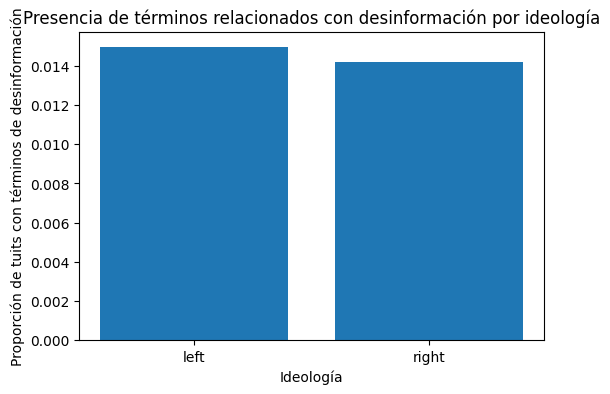

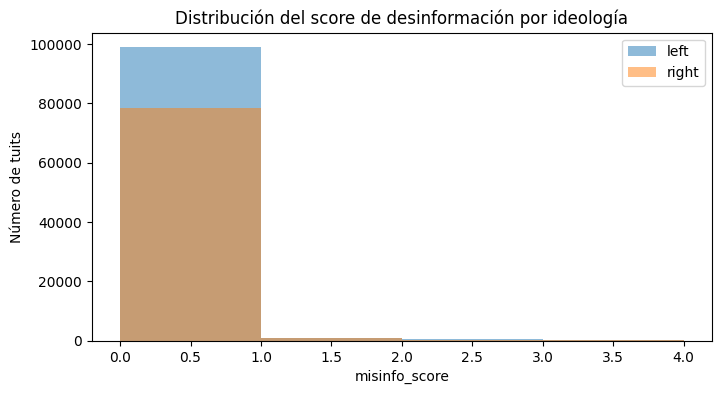

In [ ]:
import matplotlib.pyplot as plt

# Barra: proporción de tuits con misinfo_flag=1 por ideología
plt.figure(figsize=(6,4))
plt.bar(grouped_flag["ideology_binary"], grouped_flag["proportion"])
plt.ylabel("Proporción de tuits con términos de desinformación")
plt.xlabel("Ideología")
plt.title("Presencia de términos relacionados con desinformación por ideología")
plt.show()

# Histograma del misinfo_score por ideología
plt.figure(figsize=(8,4))
for ideol in df["ideology_binary"].unique():
    subset = df[df["ideology_binary"] == ideol]["misinfo_score"]
    plt.hist(subset, bins=[0,1,2,3,4], alpha=0.5, label=ideol)
plt.legend()
plt.xlabel("misinfo_score")
plt.ylabel("Número de tuits")
plt.title("Distribución del score de desinformación por ideología")
plt.show()


In [62]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["ideology_binary"], df["misinfo_flag"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Tabla de contingencia:\n", contingency)
print(f"Chi²={chi2:.3f}, p-value={p:.3e}")


Tabla de contingencia:
 misinfo_flag         0     1
ideology_binary             
left             98897  1503
right            78469  1131
Chi²=1.733, p-value=1.880e-01
